In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('C:\\Users\\dhanu\\Customer Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#replacing blanks with 0 and converting data type from object to "float"

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [49]:
df["customerID"].duplicated().sum()

0

In [16]:


def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

Converted 0 & 1 value of senior citizen to Yes/No to make it easier to analyze

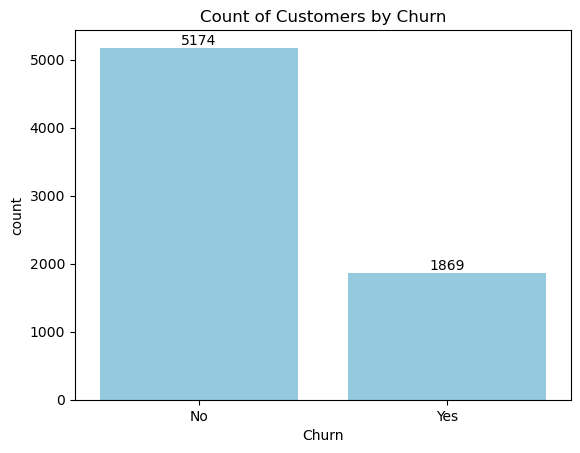

In [18]:
ax = sns.countplot(x='Churn',data = df,color='skyblue')

ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Churn")

plt.show()

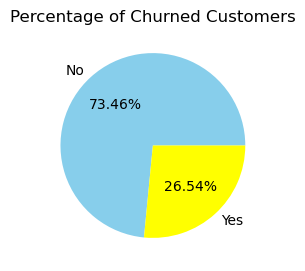

In [20]:
plt.figure(figsize=(3,3))

gb = df.groupby("Churn").agg({'Churn':'count'})

plt.pie(gb['Churn'],colors=('skyblue','yellow'),labels = gb.index ,autopct="%1.2f%%")

plt.title("Percentage of Churned Customers")

plt.show()

26.54% of customers have churned out , lets explore the reason

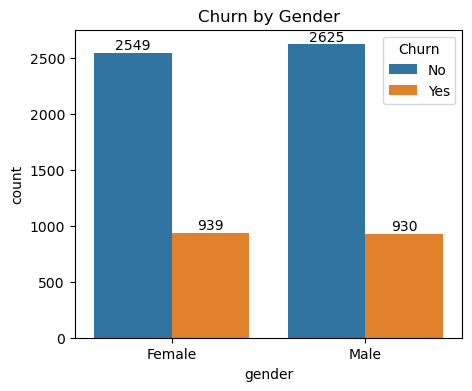

In [103]:
plt.figure(figsize=(5,4))

ax=sns.countplot(x="gender",hue="Churn",data=df)

ax.bar_label(ax.containers[0])

ax.bar_label(ax.containers[1])


plt.title("Churn by Gender")

plt.show()

Female & Male Churn is significantly same , gender isnt an affecting factor on churn rate

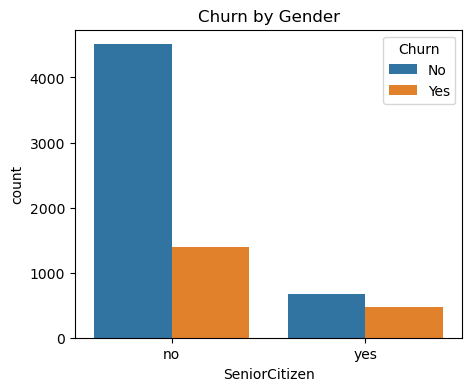

In [24]:
plt.figure(figsize=(5,4))

sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

plt.title("Churn by Gender")

plt.show()

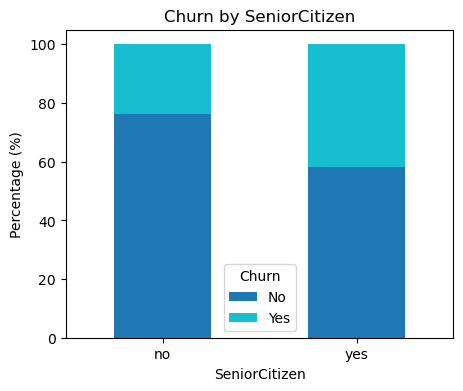

In [26]:

percentage_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

percentage_df = percentage_df.div(percentage_df.sum(axis=1), axis=0) * 100

percentage_df.plot(kind='bar', stacked=True, figsize=(5,4), colormap='tab10')

plt.title("Churn by SeniorCitizen")

plt.xlabel("SeniorCitizen")

plt.ylabel("Percentage (%)")

plt.xticks(rotation=0)

plt.legend(title="Churn")


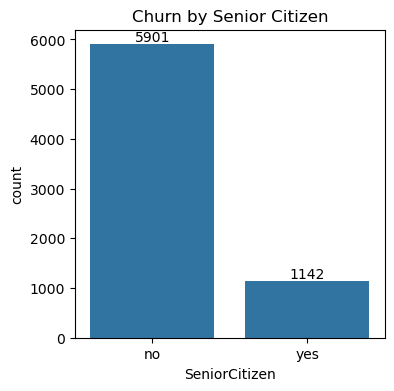

In [28]:
plt.figure(figsize=(4,4))

ax=sns.countplot(x="SeniorCitizen",data=df)

ax.bar_label(ax.containers[0])

plt.title("Churn by Senior Citizen")

plt.show()

greater percent of people in senior citizen have churned

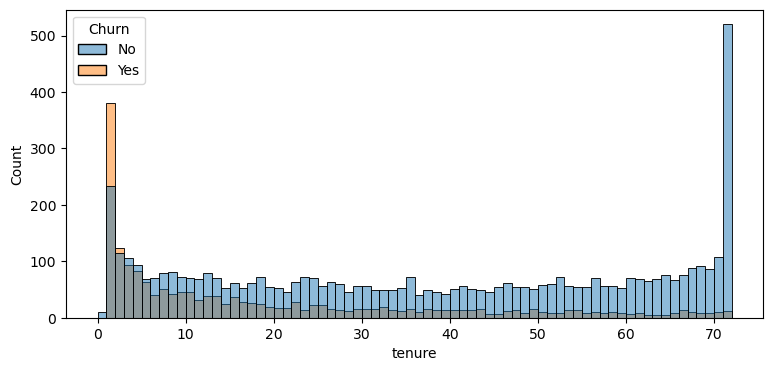

In [30]:
plt.figure(figsize=(9,4))

sns.histplot(x="tenure",data = df,bins= 72,hue="Churn")

plt.show()

people who used service for short tme have churned , people with log time have stayed

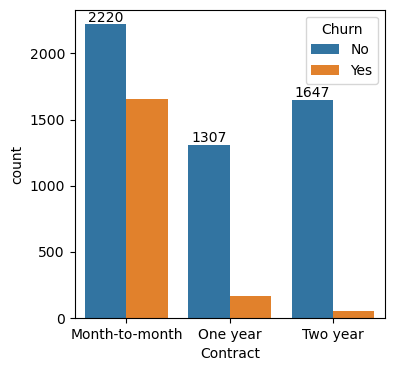

In [32]:
plt.figure(figsize=(4,4))

ax=sns.countplot(x="Contract",data=df,hue="Churn")

ax.bar_label(ax.containers[0])

plt.show()

People who have month to month contract are likely to churn from those who have another contracts

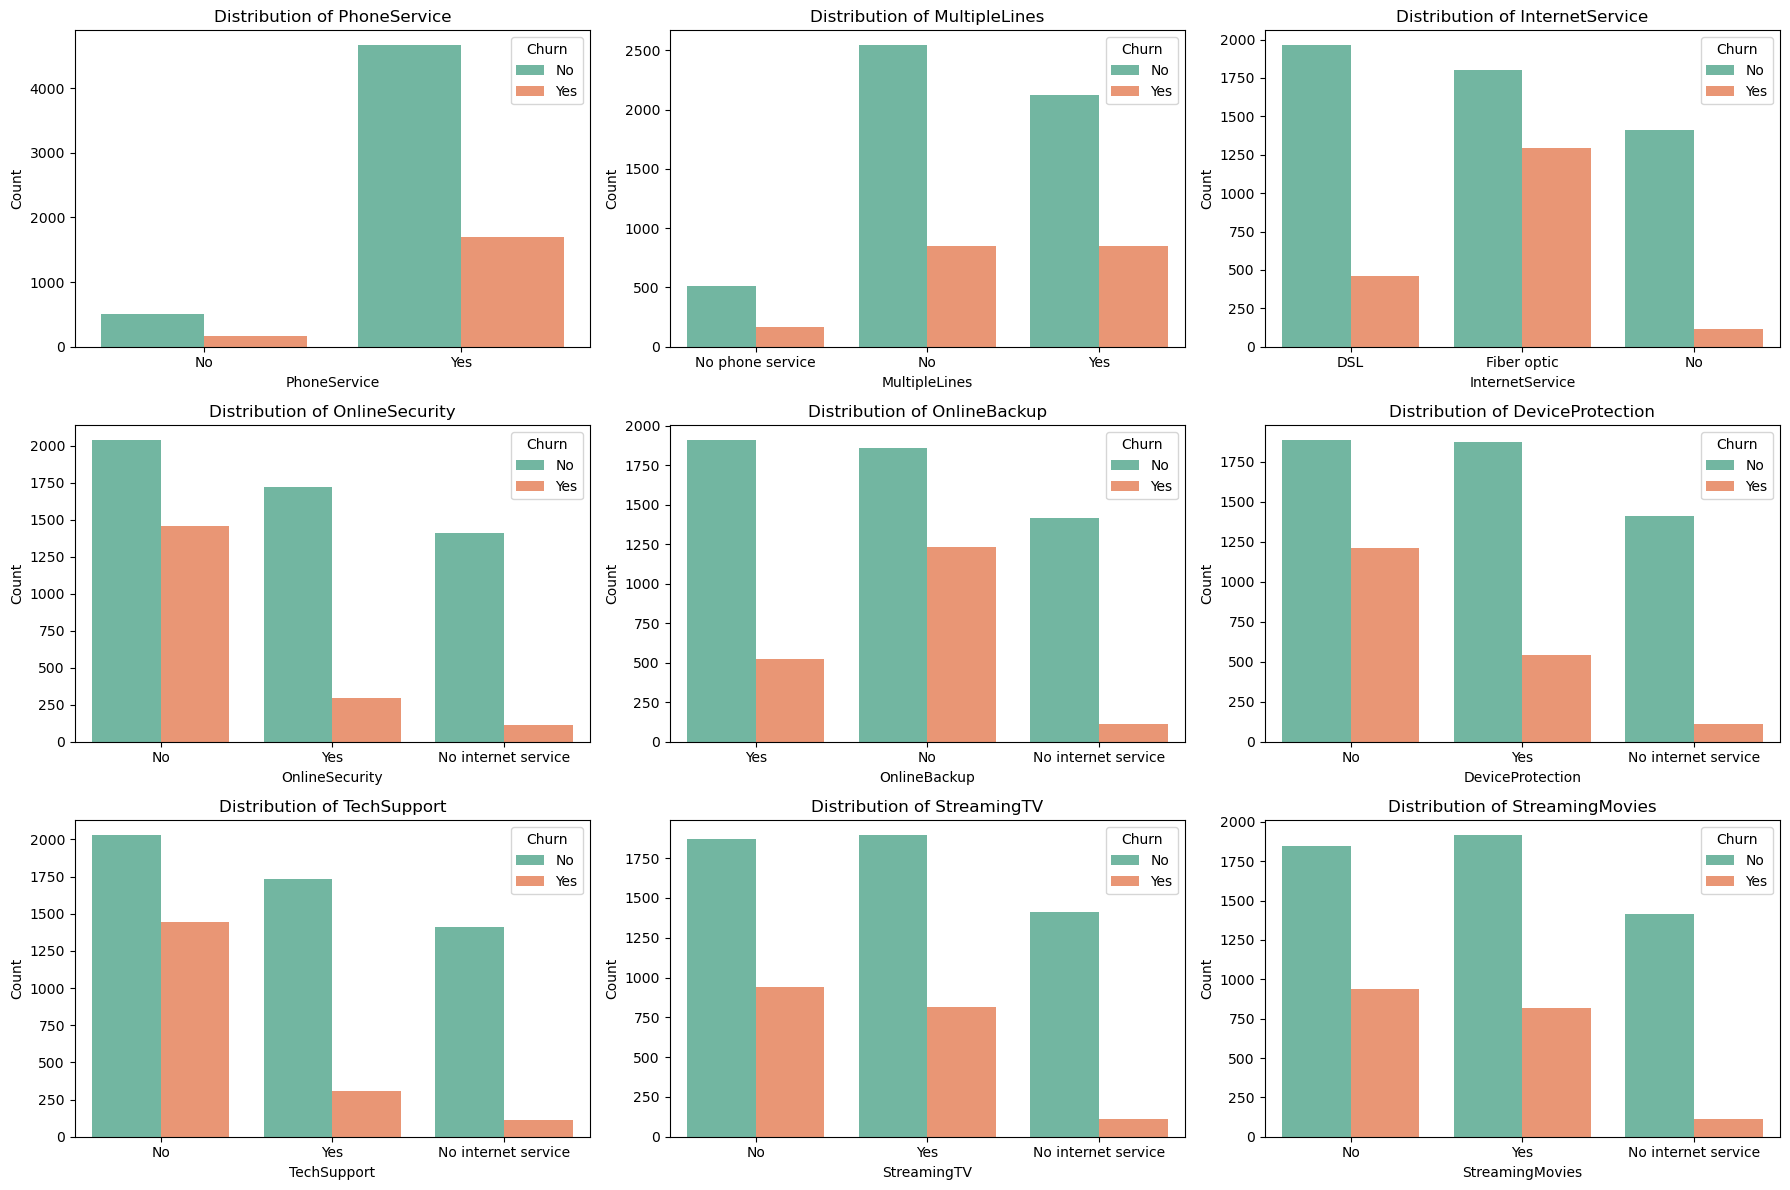

In [34]:


# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define the number of rows and columns for subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))

# Flatten the axes for easier access during iteration
axes = axes.flatten()

# Loop over the columns and create countplots for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"],palette="Set2")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the layout to avoid overlap
plt.tight_layout()


plt.show()


Churn is higher among customers with Fiber optic internet, and those without additional services like OnlineSecurity, TechSupport, or DeviceProtection.
Customers who have no internet service or additional features tend to churn less.

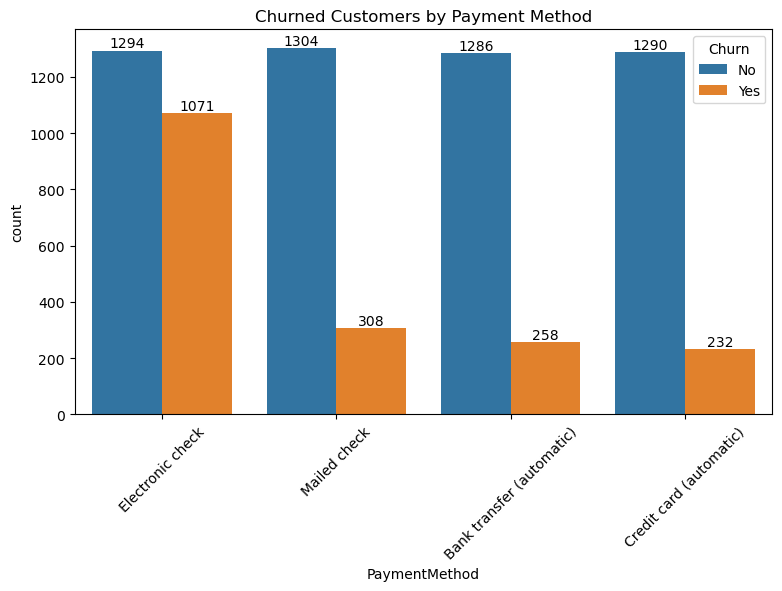

In [57]:
plt.figure(figsize=(9,5))

ax=sns.countplot(x="PaymentMethod",data = df , hue ="Churn")

ax.bar_label(ax.containers[0])

ax.bar_label(ax.containers[1])

plt.title("Churned Customers by Payment Method")

plt.xticks(rotation = 45)

plt.show()

Customers is likely to churn when they use 'Electronic Check' as payment method

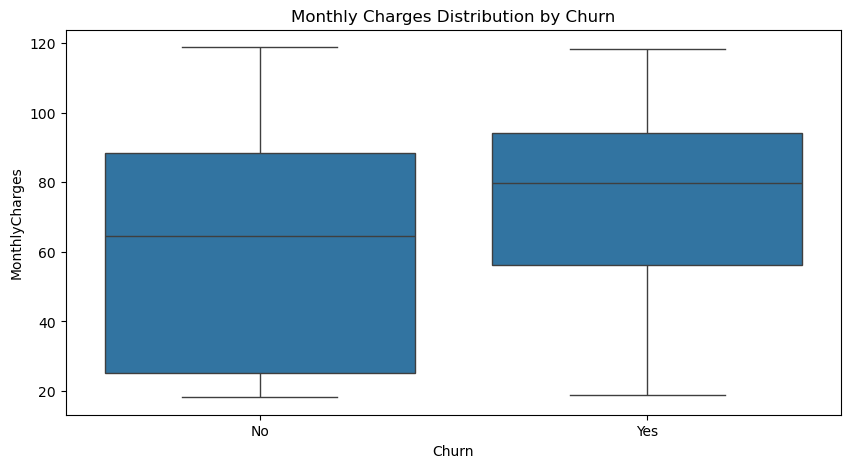

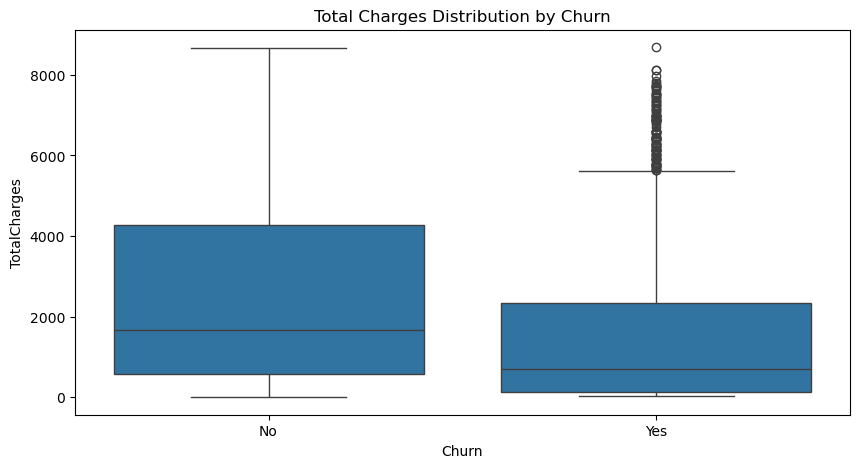

In [73]:
plt.figure(figsize=(10,5))

sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

plt.title("Monthly Charges Distribution by Churn")

plt.show()

plt.figure(figsize=(10,5))

sns.boxplot(x='Churn',y='TotalCharges',data=df)

plt.title("Total Charges Distribution by Churn")

plt.show()



The box plots show that customers who churn tend to have higher MonthlyCharges but lower TotalCharges, indicating shorter tenure

C:\Users\dhanu\AppData\Local\Temp\ipykernel_17916\3858582186.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='tenure',data=df[df['Churn']=='Yes'],shade=True,label='Churn=Yes')
C:\Users\dhanu\AppData\Local\Temp\ipykernel_17916\3858582186.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='tenure',data=df[df['Churn']=='No'],shade=True,label='Churn=No')


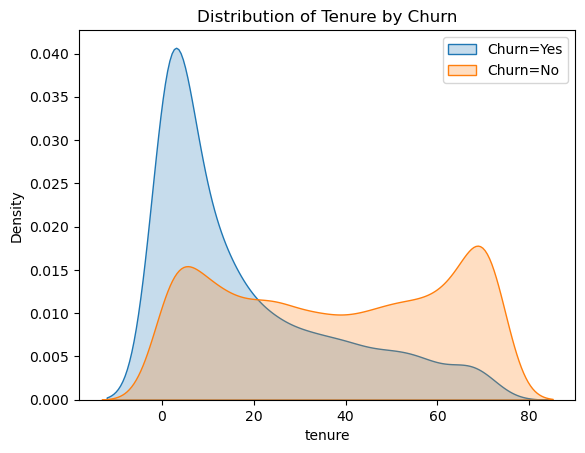

In [75]:
sns.kdeplot(x='tenure',data=df[df['Churn']=='Yes'],shade=True,label='Churn=Yes')

sns.kdeplot(x='tenure',data=df[df['Churn']=='No'],shade=True,label='Churn=No')

plt.title('Distribution of Tenure by Churn')

plt.legend()

plt.show()

The KDE plot highlights that churned customers generally have much shorter tenure,
leaving earlier in their subscription, while non-churned customers are more likely to stay longer.

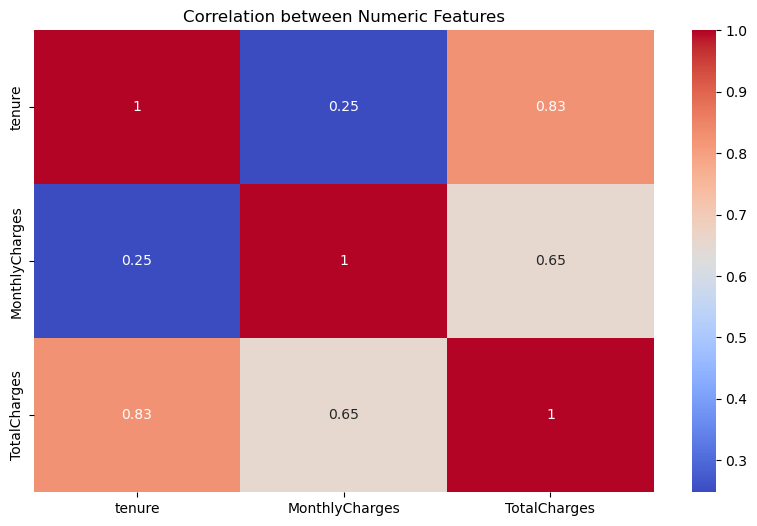

In [82]:
plt.figure(figsize=(10,6))

corr=df[['tenure','MonthlyCharges','TotalCharges']].corr()

sns.heatmap(corr,annot=True,cmap='coolwarm')

plt.title('Correlation between Numeric Features')

plt.show()

The correlation heatmap shows a strong positive relationship between tenure and TotalCharges (0.83),
indicating that longer tenure results in higher total charges. MonthlyCharges are moderately correlated with TotalCharges (0.65),
but less so with tenure (0.25),
suggesting that monthly charges don't significantly depend on customer tenure.

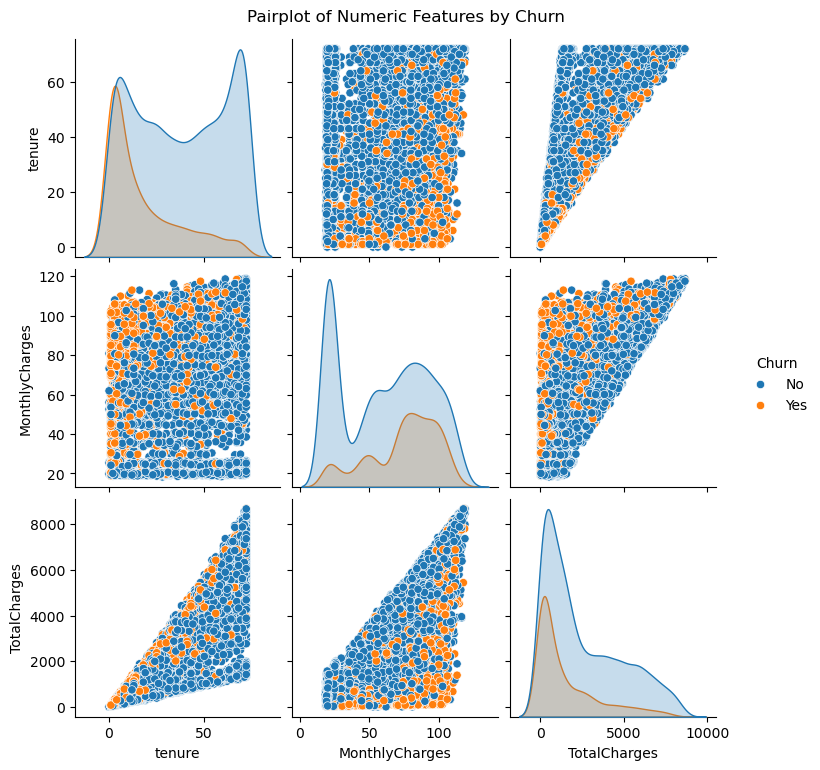

In [92]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']],hue='Churn',diag_kind='kde')

plt.suptitle('Pairplot of Numeric Features by Churn', y=1.02)

plt.show()

Each subplot shows how these features correlate, with blue points representing customers who did not churn and orange points representing those who did. 
Density plots on the diagonal display the distributions of these features by churn status.
Noticeable patterns include a higher churn rate for customers with shorter tenures and higher monthly charges.